# Electric Fields

We present how to handle electric fields


The built-in electric fields are callables dependent on time. GRANAD offers pre-defined options for monochromatic waves, useable via `Wave`, Gaussian pulses with a plane-wave profile, useable via `Pulse` and ramped-up fields, useable via `Ramp`. They are all documented in the API.


In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from granad import Wave
help(Wave)

Help on function Wave in module granad.fields:

Wave(amplitudes: list[float], frequency: float)
    Function for computing time-harmonic electric fields.

    Args:
        amplitudes: electric field amplitudes in xyz-components
        frequency: angular frequency

    Returns:
       Function that computes the electric field as a functon of time



So, calling "Wave" gives back a function we can evaluate at single points in time

In [2]:
wave = Wave( amplitudes = [1, 0, 0], frequency = 1  )
print(wave(0))

[1. 0. 0.]


A quick way to visualize them is to plot them (by default, GRANAD considers real fields). To evaluate the electric field in many points, we need to vectorize it to obtain an array of results. JAX offers the vmap function that vectorizes the application.

In [3]:
time = jnp.linspace(0, 2 * 2 * jnp.pi, 100)
e_field = jax.vmap( wave ) (time)
print(e_field.shape)

(100, 3)


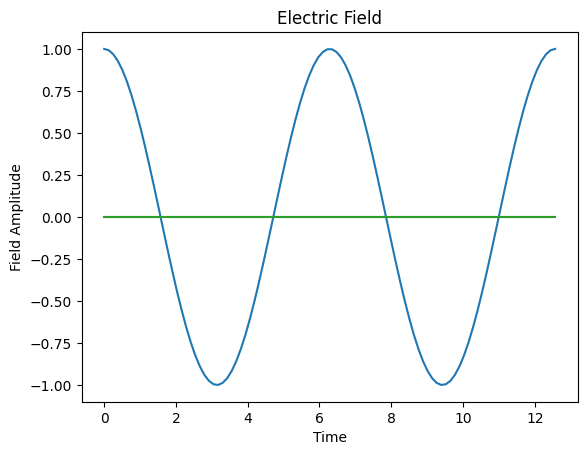

In [4]:
plt.plot(time, e_field)
plt.title("Electric Field")
plt.xlabel("Time")
plt.ylabel("Field Amplitude")
plt.show()

The `Ramp` electric field introduces a ramping effect to the field amplitude. 
The field ramping can be shifted in time via the parameter `time_ramp` and the duration of this ramping effect is controlled by `ramp_duration`.
The `amplitudes` parameter defines the field components in the x, y, and z directions, while `frequency` specifies the angular frequency of the field.

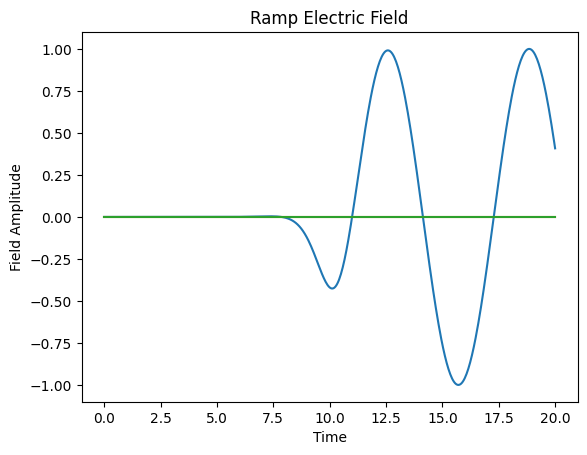

In [5]:
from granad import Ramp
ramp = Ramp(amplitudes=[1, 0, 0], frequency=1, ramp_duration=5, time_ramp=10)
time = jnp.linspace(0, 20, 500)
e_field_ramp = jax.vmap(ramp)(time)

plt.figure()
plt.plot(time, e_field_ramp)
plt.title("Ramp Electric Field")
plt.xlabel("Time")
plt.ylabel("Field Amplitude")
plt.show()

The `Pulse` electric field introduces a temporally localized oscillation using a Gaussian envelope.
The `peak` parameter specifies the time at which the pulse reaches its maximum amplitude, and `fwhm` (full width at half maximum) controls the width of the pulse.
Similar to `Wave` and `Ramp`, `amplitudes` and `frequency` define the field components and oscillation frequency.

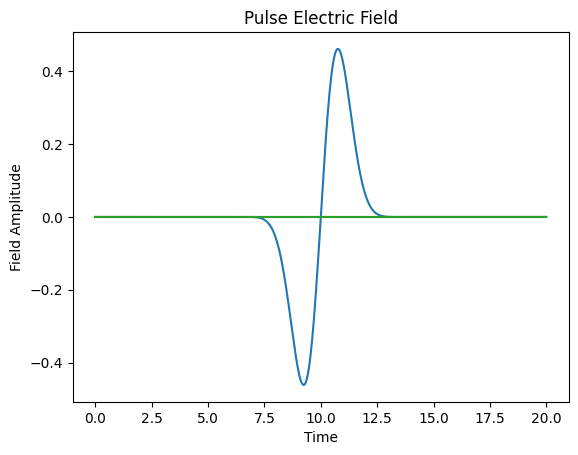

In [6]:
from granad import Pulse
pulse = Pulse(amplitudes=[1, 0, 0], frequency=1, peak=10, fwhm=2)
time = jnp.linspace(0, 20, 500)
e_field_pulse = jax.vmap(pulse)(time)

plt.figure()
plt.plot(time, e_field_pulse)
plt.title("Pulse Electric Field")
plt.xlabel("Time")
plt.ylabel("Field Amplitude")
plt.show()